In [1]:
from netCDF4 import Dataset
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wrf
from wrf import getvar, vinterp, ALL_TIMES, destagger, to_np

C:\Users\dell\Anaconda3\lib\site-packages\xarray\core\merge.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
expruns = ['20120816_d03_gfs05_p1r1', '20120816_d03_gfs05_p1r3','20120816_d03_gfs05_p1r5',
           '20120816_d03_gfs05_p2r1', '20120816_d03_gfs05_p2r3','20120816_d03_gfs05_p2r5',
           '20120816_d03_nam32_p1r1', '20120816_d03_nam32_p1r3','20120816_d03_nam32_p1r5',
           '20120816_d03_nam32_p2r1', '20120816_d03_nam32_p2r3','20120816_d03_nam32_p2r5' ]
expnames = ['g1r1', 'g1r3', 'g1r5', 'g2r1', 'g2r3', 'g2r5', 
            'n1r1', 'n1r3', 'n1r5', 'n2r1', 'n2r3', 'n2r5']

In [3]:
d1 = '/media/rello/HDD/d03/'
d2 = '../../../../../d03/'
folder = d2
f = folder+expruns[0]+'.nc'
print(f)
ds = Dataset(f)

../../../../../d03/20120816_d03_gfs05_p1r1.nc


In [4]:
wrftime = getvar(ds, "times", timeidx=ALL_TIMES)
utc2loc = np.timedelta64(6,'h')
wrftime10m = pd.to_datetime(wrftime.values)-utc2loc
wrftimeh = pd.to_datetime(wrftime[::3].values)-utc2loc
timelabel = wrftimeh
date1, date2 = wrftimeh[0], wrftimeh[wrftimeh.size-1]
print(wrftimeh.size, date1, date2)

145 2012-08-16 12:00:00 2012-08-19 12:00:00


C:\Users\dell\Anaconda3\lib\site-packages\xarray\core\dataarray.py:217: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif isinstance(data, pd.Panel):


In [5]:
#t1, t2, t3, t4 = '2012-08-16 18:00', '2012-08-17 18:00', '2012-08-18 18:00', '2012-08-19 06:00'
t1, t4 = '2012-08-17 00:00', '2012-08-19 00:00'
ids = [0,1,2,7,12,17,22,27,32,37,42,47]

sread_w =  pd.read_pickle('sodar_sp.pk')
sread_d =  pd.read_pickle('sodar_dd.pk')
sread_t =  pd.read_pickle('sodar_tv.pk')

sodarw =  sread_w.iloc[:,ids][t1:t4].interpolate().values
sodard =  sread_d.iloc[:,ids][t1:t4].interpolate().values
sodart =  sread_t.iloc[:,ids][t1:t4].interpolate().values

x = sread_w.iloc[:,ids][t1:t4].index
#x1 = sread_w.iloc[:,ids][t1:t2].index
#x2 = sread_w.iloc[:,ids][t2:t3].index
#x3 = sread_w.iloc[:,ids][t3:t4].index

In [7]:
# ax.set_xticks([]) # values
# ax.set_xticklabels([]) # labels

In [8]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.ticker import FormatStrFormatter
# https://matplotlib.org/examples/color/named_colors.html 

import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from wrf import to_np, getvar, smooth2d, get_cartopy, cartopy_xlim, cartopy_ylim, latlon_coords


ua = xr.open_dataset('interp30/g1r1.nc')
lats, lons = latlon_coords(ua)
lats, lons = to_np(lats), to_np(lons)

print(lats.min(), lats.max(), lons.min(), lons.max())

19.073235 19.324875 -103.960144 -103.693665


In [9]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.ticker import FormatStrFormatter
# https://matplotlib.org/examples/color/named_colors.html 

import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from wrf import to_np, getvar, smooth2d, get_cartopy, cartopy_xlim, cartopy_ylim, latlon_coords

def levPlot(xp,tt,lev):
    
    zlev = ['m30', '40m', '50m', '100m', '150m', '200m', '250m', '300m', '350m', '400m', '450m', '500m']
    f = folder+expruns[0]+'.nc'
    ncfile = Dataset(f)
    cart = getvar(ncfile, "ua")
    cart_proj = get_cartopy(cart)

    ua = xr.open_dataset('interp30/'+expnames[xp-1]+'.nc')['ua30'][tt,lev,:,:]
    va = xr.open_dataset('interp30/'+expnames[xp-1]+'.nc')['va30'][tt,lev,:,:]
    tv = xr.open_dataset('interp30/'+expnames[xp-1]+'.nc')['tv30'][tt,lev,:,:]

    lats, lons = latlon_coords(ua)
    lats, lons = to_np(lats), to_np(lons)
    va = to_np(va)
    ua = to_np(ua)
    tv = to_np(tv)
    UV = np.sqrt(np.power(ua,2) + np.power(va,2))

    fig = plt.figure(figsize=(6,9))
    ax = plt.axes(projection=cart_proj)

    sk = 4
    vmin, vmax = 0, 12.5
    levels = np.arange(vmin,vmax,0.5)
    contf = ax.contourf(lons, lats, UV, 10, levels=levels, vmin=vmin, vmax=vmax, 
                        transform=crs.PlateCarree(), cmap=get_cmap("jet"))
    plt.colorbar(contf, ax=ax, orientation="horizontal", pad=.05)
    CS = plt.contour(lons, lats, tv, transform=crs.PlateCarree(), colors='w')
    plt.clabel(CS, inline=1, fmt='%2.1f', colors='w', fontsize=10)
    
    Q = ax.quiver(lons[::sk,::sk], lats[::sk,::sk], ua[::sk,::sk], va[::sk,::sk],
                  transform=crs.PlateCarree(), scale=60, pivot='mid')
    ax.quiverkey(Q, X=0.2, Y=1.05, U=5, label=' 5 m/s', labelpos='W')

    xticks = ax.get_xticks()
    x1, x2 = xticks.min()*(0.999), xticks.max()*(1.005)
    xticks = np.linspace(x1, x2,30)
    xlabel = (lons[15,:][::sk])
    ax.set_xticks(xticks[::sk], minor=False)
    ax.set_xticklabels(xlabel.round(2), rotation=15)

    yticks = ax.get_yticks()
    y1, y2 = yticks.min()*0.985, yticks.max()*1.015
    yticks = np.linspace(y1, y2,30)
    ylabel = (lats[:,15][::sk])
    ax.set_yticks(yticks[::sk], minor=False)
    ax.set_yticklabels(ylabel.round(2), rotation=15)

    plt.title(expnames[xp]+' UV at '+zlev[lev]+'\n' +str(wrftimeh[tt]));


In [10]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.ticker import FormatStrFormatter
# https://matplotlib.org/examples/color/named_colors.html 

import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from wrf import to_np, getvar, smooth2d, get_cartopy, cartopy_xlim, cartopy_ylim, latlon_coords

def levPlot6(xp,tt,lev,vmax):
    
    zlev = ['30m', '40m', '50m', '100m', '150m', '200m', '250m', '300m', '350m', '400m', '450m', '500m']
    f = folder+expruns[0]+'.nc'
    ncfile = Dataset(f)
    cart = getvar(ncfile, "ua")
    cart_proj = get_cartopy(cart)

    ua = xr.open_dataset('interp30/'+expnames[xp]+'.nc')['ua30'][tt,lev,:,:]
    va = xr.open_dataset('interp30/'+expnames[xp]+'.nc')['va30'][tt,lev,:,:]
    tv = xr.open_dataset('interp30/'+expnames[xp]+'.nc')['tv30'][tt,lev,:,:]

    lats, lons = latlon_coords(ua)
    lats, lons = to_np(lats), to_np(lons)
    va = to_np(va)
    ua = to_np(ua)
    tv = to_np(tv)
    UV = np.sqrt(np.power(ua,2) + np.power(va,2))

################
    fig = plt.figure(figsize=(6,9))
    ax = plt.axes(projection=cart_proj)
    
    ax.scatter(lons[24,20],lats[24,20], transform=crs.PlateCarree(), color='y', edgecolors='w', zorder=5)
    #print(lons[24,20],lats[24,20])
    vmin, vmax = 0, vmax
    levels = np.arange(vmin,vmax,0.5)
    clevels = np.arange(vmin,35,1)
    contf = ax.contourf(lons, lats, UV, 10, levels=levels, vmin=vmin, vmax=vmax, 
                        transform=crs.PlateCarree(), cmap=get_cmap("jet"))
    CS = plt.contour(lons, lats, tv, levels=clevels, transform=crs.PlateCarree(), colors='w')
    plt.clabel(CS, inline=1, fmt='%2.1f', colors='w', fontsize=10)
    sk = 4
    Q = ax.quiver(lons[::sk,::sk], lats[::sk,::sk], ua[::sk,::sk], va[::sk,::sk],
                  transform=crs.PlateCarree(), scale=60, pivot='mid')
    ax.quiverkey(Q, X=0.2, Y=1.05, U=5, label=' 5 m/s', labelpos='E')
    
################

    if xp == 3 or xp == 4 or xp == 5 or xp == 9 or xp == 10 or xp == 11:
        plt.colorbar(contf, ax=ax, orientation="horizontal", pad=.05)
        xticks = ax.get_xticks()
        x1, x2 = xticks.min()*(0.999), xticks.max()*(1.005)
        xticks = np.linspace(x1, x2,30)
        xlabel = (lons[15,:][::sk])
        ax.set_xticks(xticks[::sk], minor=False)
        ax.set_xticklabels(xlabel.round(2), rotation=15)
        
    if xp == 0 or xp == 3 or xp == 6 or xp == 9:
        yticks = ax.get_yticks()
        y1, y2 = yticks.min()*0.985, yticks.max()*1.015
        yticks = np.linspace(y1, y2,30)
        ylabel = (lats[:,15][::sk])
        ax.set_yticks(yticks[::sk], minor=False)
        ax.set_yticklabels(ylabel.round(2), rotation=15)
            
    if xp == 1 or xp == 7:
        plt.title(' Velocidad '+zlev[lev]+' \n '+str(wrftimeh[tt])+' \n'+expnames[xp], y = 1.01)
    else:
        plt.title(expnames[xp])


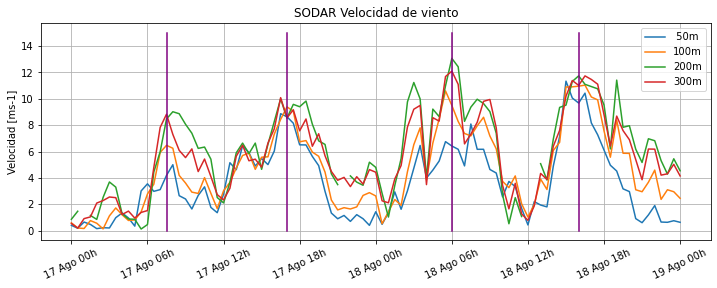

In [14]:
sp = pd.read_pickle('sodar_sp.pk')

fig = plt.figure(figsize=[12,4])
s50 =   sp['spd_50'][t1:t4]
s100 =  sp['spd_50'][t1:t4]
s100 = sp['spd_100'][t1:t4]
s200 = sp['spd_300'][t1:t4]
s300 = sp['spd_200'][t1:t4]

nx = s100.size
xdelta = 6
xloc = np.arange(nx)
tickname = s100[::xdelta*2].index.strftime('%d Ago %Hh').tolist()
plt.xticks(np.arange(nx)[::xdelta*2], tickname, rotation=25);
plt.plot(xloc, s50, label=' 50m')
plt.plot(xloc, s100, label='100m')
plt.plot(xloc, s200, label='200m')
plt.plot(xloc, s300, label='300m')

h = 16
plt.plot([15]*h,range(h), color='purple')
plt.plot([34]*h,range(h), color='purple')
plt.plot([60]*h,range(h), color='purple')
plt.plot([80]*h,range(h), color='purple')


plt.ylabel('Velocidad [ms-1]')
#plt.xlabel('Fecha')
plt.grid(True)
plt.legend()

plt.title('SODAR Velocidad de viento')
figname='wrf_spd_'
#plt.savefig(dirs+figname+'_'+rtimes+'_'+run+'.png', dpi=300)
plt.show()

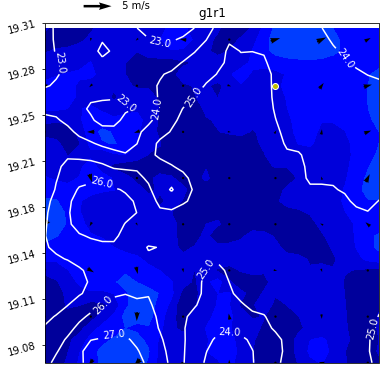

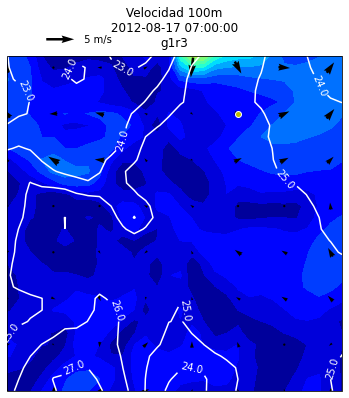

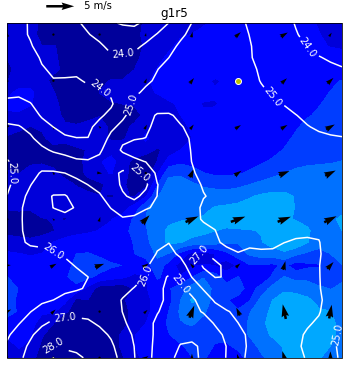

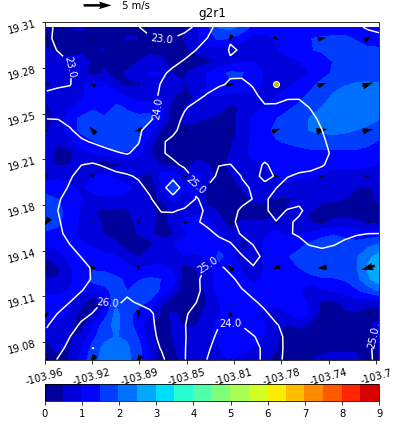

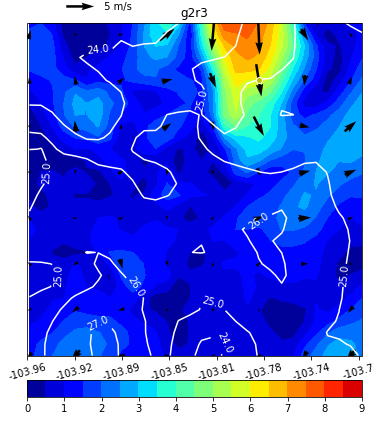

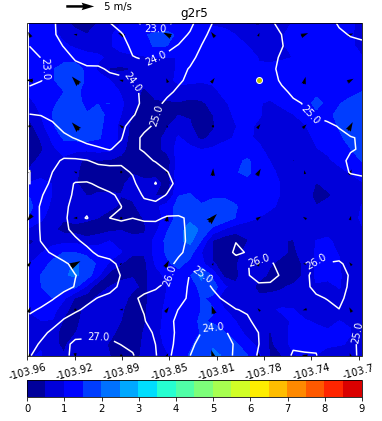

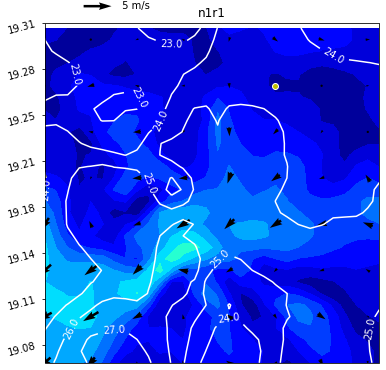

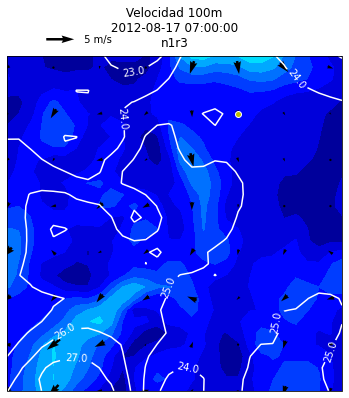

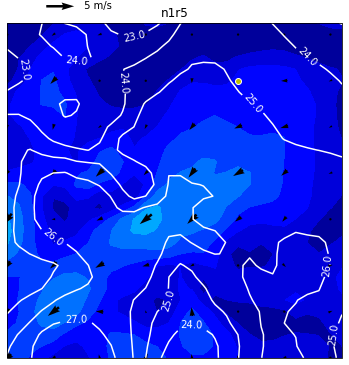

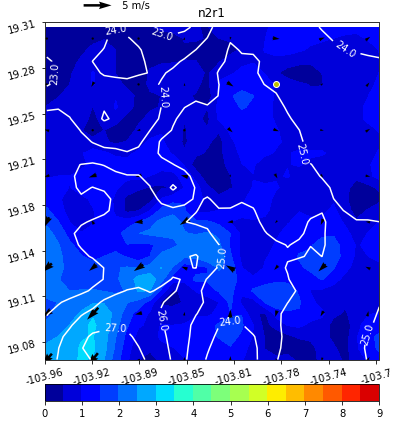

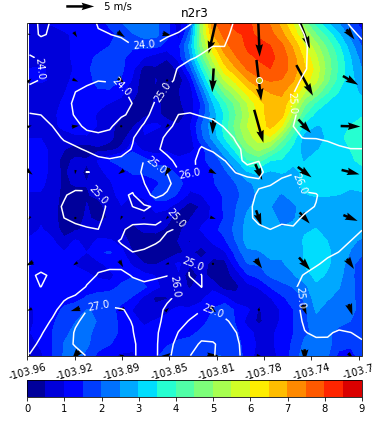

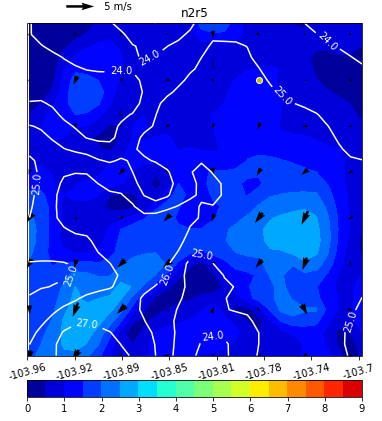

In [27]:
tt=24+14
for xp in range(0,12):
    levPlot6(xp=xp,tt=tt,lev=3,vmax=9.5)

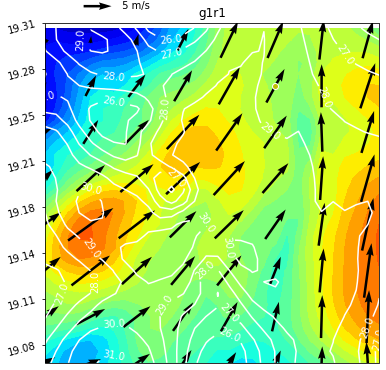

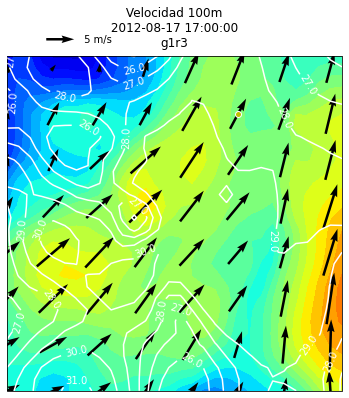

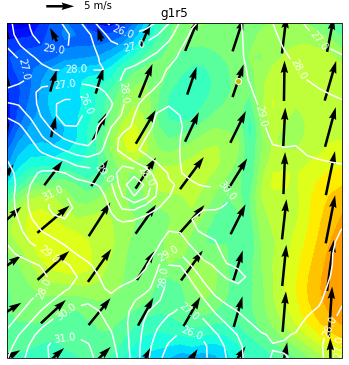

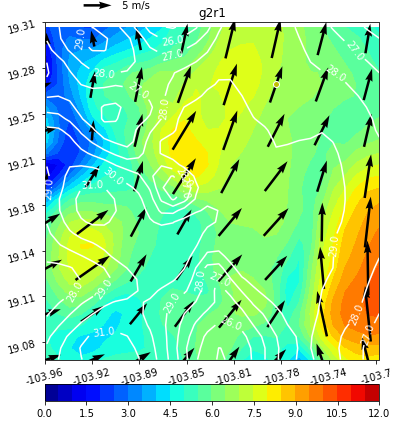

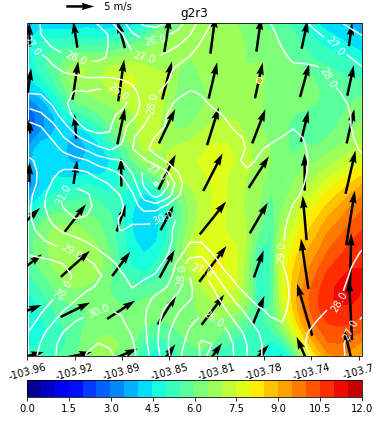

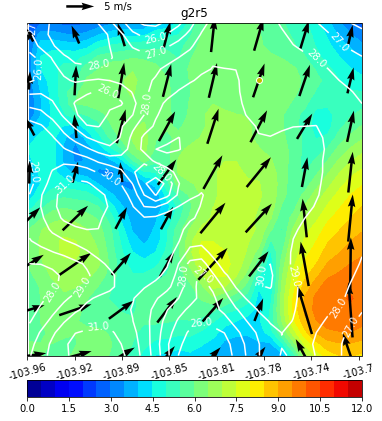

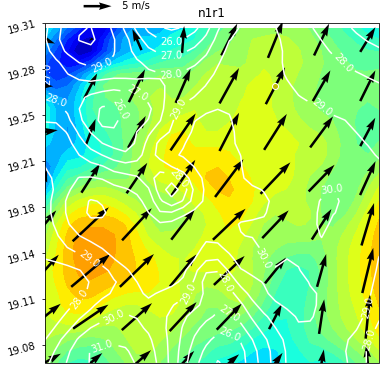

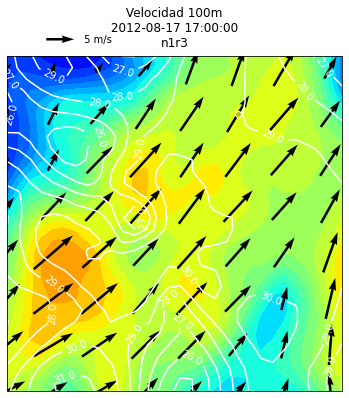

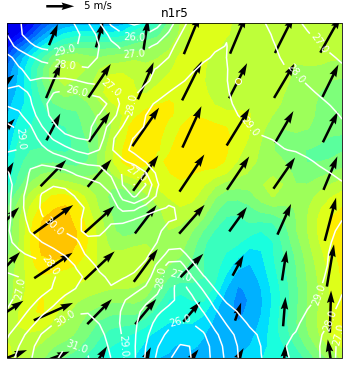

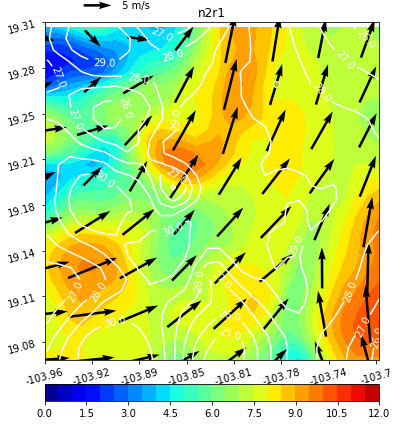

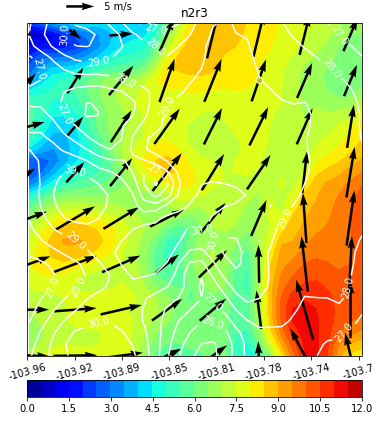

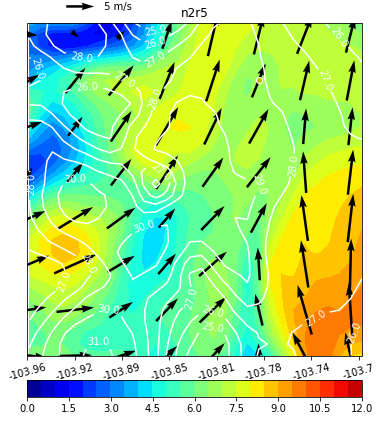

In [29]:
tt=24+34
for xp in range(0,12):
    levPlot6(xp=xp,tt=tt,lev=3,vmax=12.5)

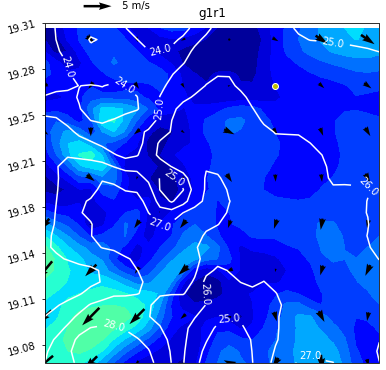

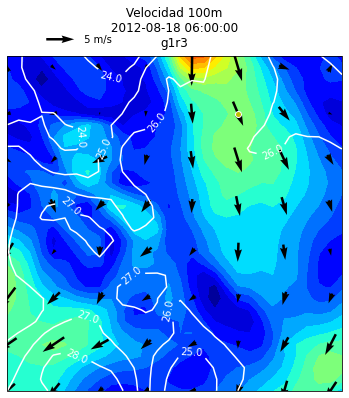

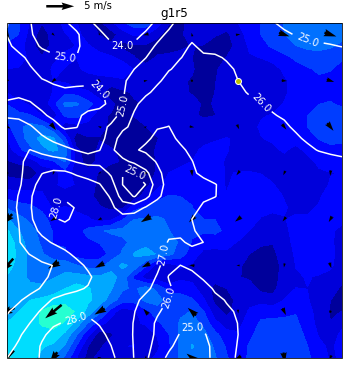

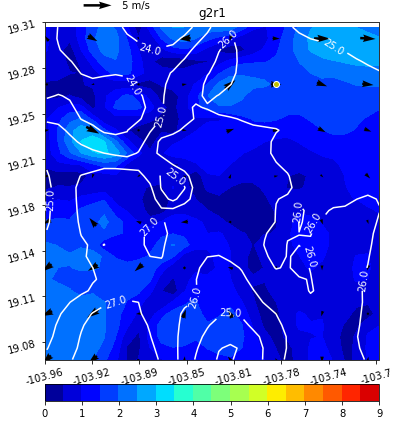

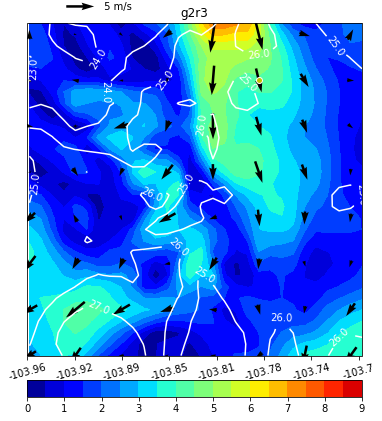

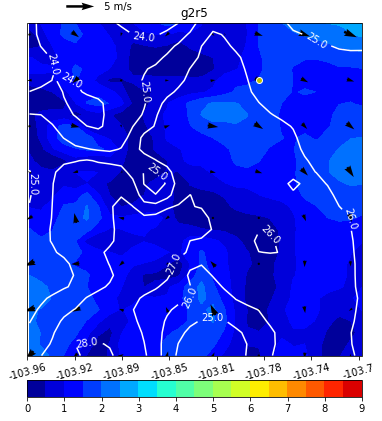

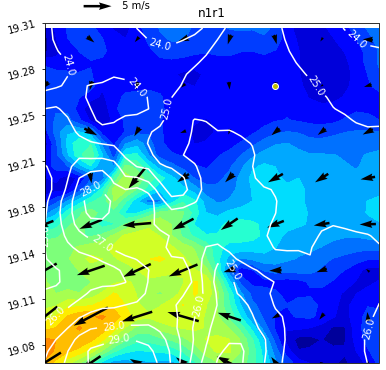

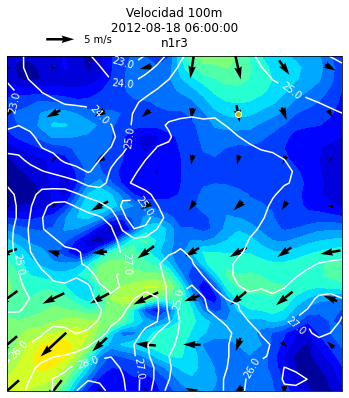

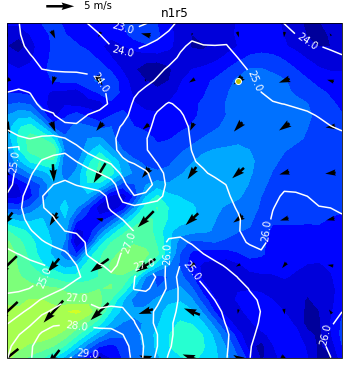

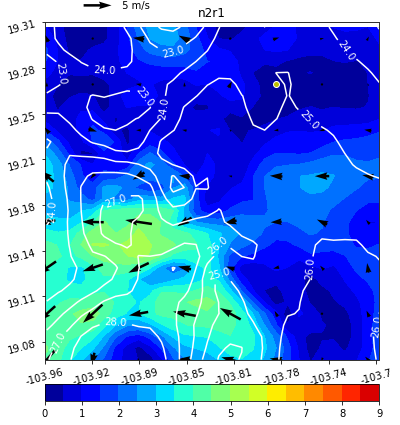

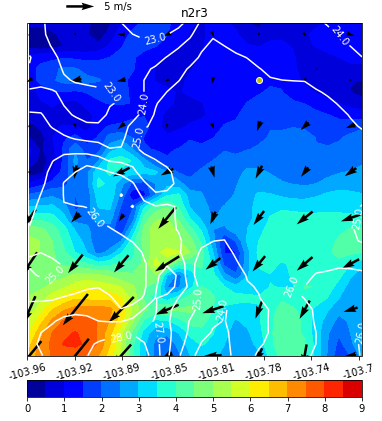

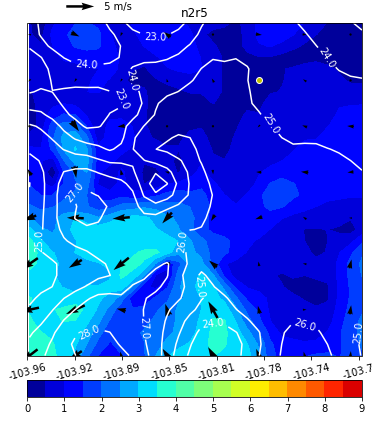

In [28]:
tt=24+60
for xp in range(0,12):
    levPlot6(xp=xp,tt=tt,lev=3,vmax=9.5)

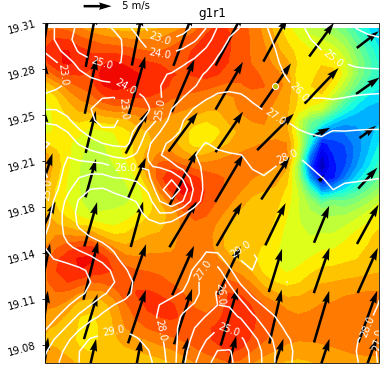

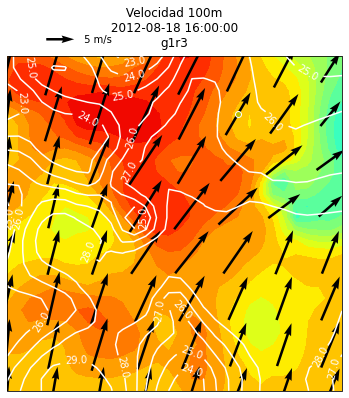

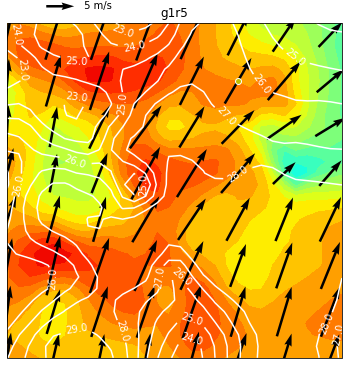

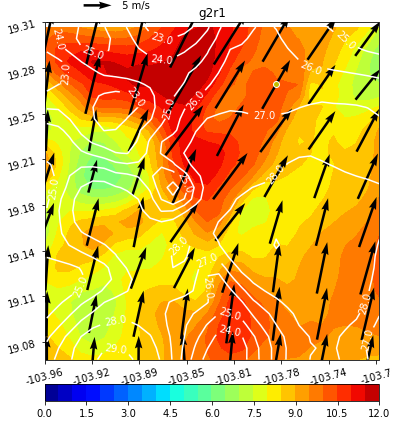

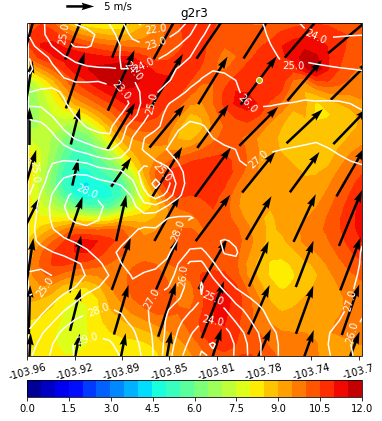

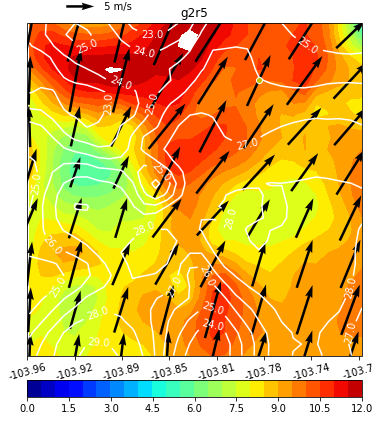

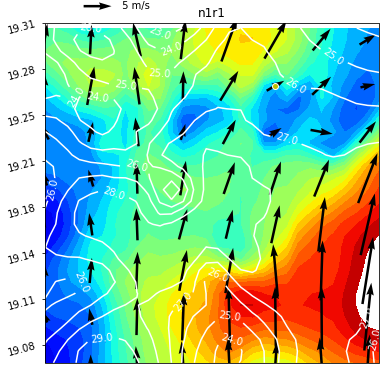

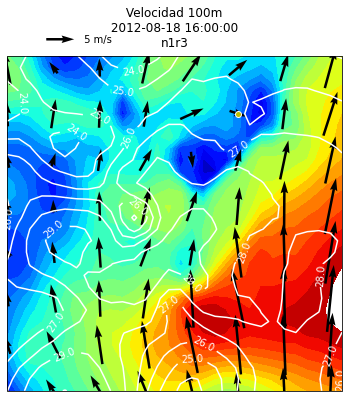

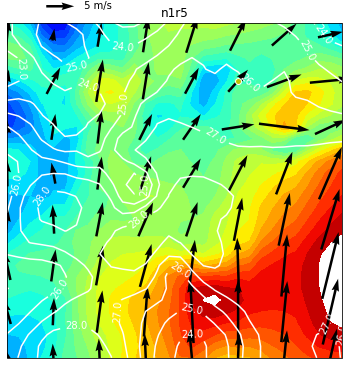

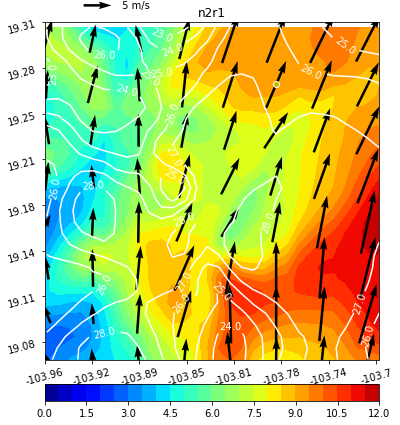

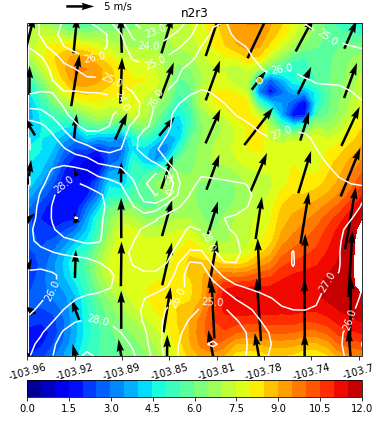

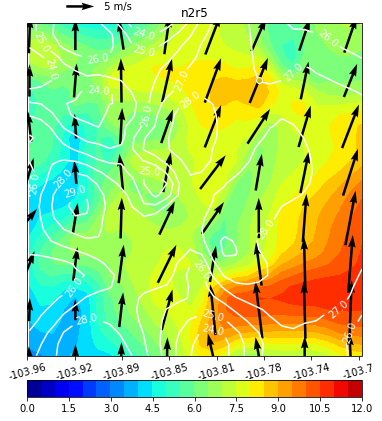

In [25]:
tt=24+80
for xp in range(0,12):
    levPlot6(xp=xp,tt=tt,lev=3,vmax=12.5)